# Exercise 4.1 and 4.2

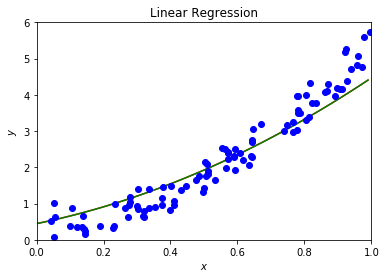

Hand computed predicted coeffs are
[[0.44666847]
 [1.89167218]
 [2.12987024]]
Coefs from sci-kit learn are:
[[0.44666847 1.89167218 2.12987024]]
We had lambda equad to 5.00
With a noise of 1.00


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

# Setup input data. 
# We make numberofpoints points
# the x's are chosen randomly 
# the y's according to the fomula and with some noise
numberofpoints = 100
noise = 1
x = np.random.rand(numberofpoints,1)
y = 5*x*x + noise*np.random.rand(numberofpoints,1)

# Make \hat{X} matrix, xb, with rows of 1, x, x^2
xb = np.c_[np.ones((numberofpoints,1)),x,x*x]

# ridge parameter lambda
lamb = 5.0

# Compute beta matrix according to formula from Hastings (3.44) 
# Beta will contain the coefficients of our "predicted" second degree polynomial
beta = np.linalg.inv(xb.T.dot(xb) + lamb*np.identity(3)).dot(xb.T).dot(y)

#######################
###
###
# I think my computation has a problem,
# since i penalize the intecept term.
# I should avarage the x's and x^2's 
# and then recompute the intercept by hand. 
# I tried to do that in the cell below
###
###
########################

# Use the functionality of sci-kit learn to compute the same thing
ridgereg = Ridge(alpha = lamb, fit_intercept = False)
ridgereg.fit(xb, y)

# generate a bunch of x's for plotting
xstep = 0.01
xstepinv = 100
xpoints = np.arange(0.0, 1.0, xstep)

# Compute the predicted y values for all the plotting x's
xbnew = np.c_[np.ones((xstepinv,1)), xpoints, xpoints*xpoints]
mypredict = xbnew.dot(beta)
#scipredict = ridgereg.predict(np.c_[xpoints, xpoints*xpoints])
scipredict = ridgereg.predict(xbnew)
# Do the plotting
# first draw a line between the plotting x's and their predicted y's (by my computations) 
plt.plot(xpoints, mypredict, "r-")
# Draw a line between the plotting x's and the sci-kit predicted y's
plt.plot(xpoints, scipredict, "g-")
# Then plot the points we predicted from
plt.plot(x, y ,'bo')
# Setup axis and labels
plt.axis([0, 1.0, 0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')
plt.show()

print("Hand computed predicted coeffs are")
print(beta)
print("Coefs from sci-kit learn are:")
print(ridgereg.coef_)
print("We had lambda equad to %.2f" % lamb)
print("With a noise of %.2f" % noise)

## Ridge try 2,  now normalizing inputs

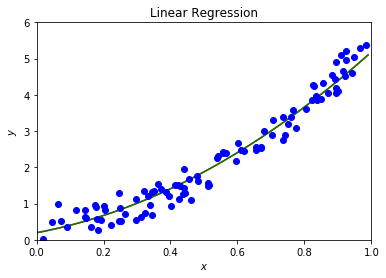

Hand computed predicted coeffs are
[[0.19527953]]
[[1.73306552]
 [3.25304902]]
Coefs from sci-kit learn are:
[0.19527953]
[[1.73306552 3.25304902]]
We had lambda equad to 0.50
With a noise of 1.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

# Setup input data. 
# We make numberofpoints points
# the x's are chosen randomly 
# the y's according to the fomula and with some noise
numberofpoints = 100
noise = 1
x = np.random.rand(numberofpoints,1)
y = 5*x*x + noise*np.random.rand(numberofpoints,1)

# Make avarage input matrix \hat{X} 
x1bar = sum(x)/len(x)
x2bar = sum(x*x)/len(x)
xb = np.c_[x - x1bar, x*x - x2bar]

# ridge parameter lambda
lamb = .50

# Compute beta matrix according to formula from Hastings (3.44) 
# Beta will contain the coefficients of our "predicted" second degree polynomial
b0 = sum(y)/len(y)
beta = np.linalg.inv(xb.T.dot(xb) + lamb*np.identity(2)).dot(xb.T).dot(y-b0)


# Use the functionality of sci-kit learn to compute the same thing
ridgereg = Ridge(alpha = lamb)
ridgereg.fit(np.c_[x, x*x], y)
#ridgereg.fit(np.c_[x], y)

# generate a bunch of x's for plotting
xstep = 0.01
xstepinv = 100
xpoints = np.arange(0.0, 1.0, xstep)

# Compute the predicted y values for all the plotting x's
xbnew = np.c_[xpoints, xpoints*xpoints]
myintercept = b0 - (np.c_[x1bar, x2bar]).dot(beta)
mypredict = xbnew.dot(beta) + myintercept
scipredict = ridgereg.predict(xbnew)
#scipredict = ridgereg.predict(xbnew)
# Do the plotting
# first draw a line between the plotting x's and their predicted y's (by my computations) 
plt.plot(xpoints, mypredict, "r-")
# Draw a line between the plotting x's and the sci-kit predicted y's
plt.plot(xpoints, scipredict, "g-")
# Then plot the points we predicted from
plt.plot(x, y ,'bo')
# Setup axis and labels
plt.axis([0, 1.0, 0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')
plt.show()

print("Hand computed predicted coeffs are")
print(myintercept)
print(beta)
print("Coefs from sci-kit learn are:")
print(ridgereg.intercept_)
print(ridgereg.coef_)
print("We had lambda equad to %.2f" % lamb)
print("With a noise of %.2f" % noise)



## Sci-kit learn, ridge and intercept, column of 1's

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Setup input data. 
# We make numberofpoints points
# the x's are chosen randomly 
# the y's according to the fomula and with some noise
numberofpoints = 100
noise = 0.1
x = np.random.rand(numberofpoints,1)
y = 5*x*x + noise*np.random.rand(numberofpoints,1)
# ridge parameter lambda
lamb = 0.3

# Use the functionality of sci-kit learn
ridgereg_true = Ridge(alpha = lamb, fit_intercept = True)
ridgereg_false = Ridge(alpha = lamb, fit_intercept = False)
ridgereg_true.fit(np.c_[x],y)
ridgereg_false.fit(np.c_[np.ones((numberofpoints,1)),x], y)

print("Coefs with fit_intercept = True are:")
print(ridgereg_true.intercept_)
print(ridgereg_true.coef_)
print("")
print("Coefs with fit_intercept = False, but a column of ones are:")
print(ridgereg_false.coef_)

Coefs with fit_intercept = True are:
[-0.68530224]
[[4.94446789]]

Coefs with fit_intercept = False, but a column of ones are:
[[-0.67740218  4.93349422]]


# Exercise 4.3